# Heart Failure Prediction

### To predict whether the patient is going to have a heart failure or not.
## Project Description:
You already know the world is pacing with such a brisk pace and so do the diseases, and to cure the diseases, doctors have to devote their precious time and experience that they had. But what is more concerning is the increasing number of patients than ever before, which results in more doctors and manual work. Instead of doing that, wouldn't it be awesome if we have a model which can predict whether a patient is going to have or has a particular disease or not ? That’s what we are talking about here.

The aim of this model is to predict whether a patient is going to have a heart failure or not based on certain input features. After that, we’re going to evaluate and find out how well our model is working.
The dataset includes different parameters which are helpful to cut down the chase and helps us to know the target variable. These are the following parameters included:

### dataset link :- https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv

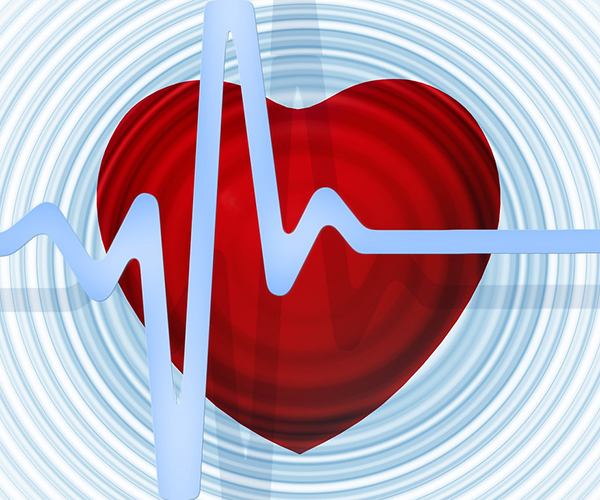

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [3]:
df = pd.read_csv('F:\\Decoder\\CaseStudies\\Heart Failure Prediction\\heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


## Data Exploration

In [4]:
# check shape of data
df.shape

(299, 13)

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
# check basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# check statistical description of dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
# check any null values present in dataset or not
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
# Check Number of Unique Values in dataset
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

### Numerical data
* age
* creatinine_phosphokinase
* ejection_fraction
* platelets
* serum_creatinine
* serum_sodium
* time

### Categorical data
* Sex - Gender of patient Male = 1, Female =0
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes
* Exploratory Data Analysis (EDA)

## Data Visualization

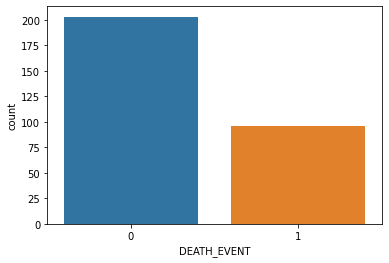

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [10]:
sns.countplot(x='DEATH_EVENT',data=df)
plt.show()
df.DEATH_EVENT.value_counts()

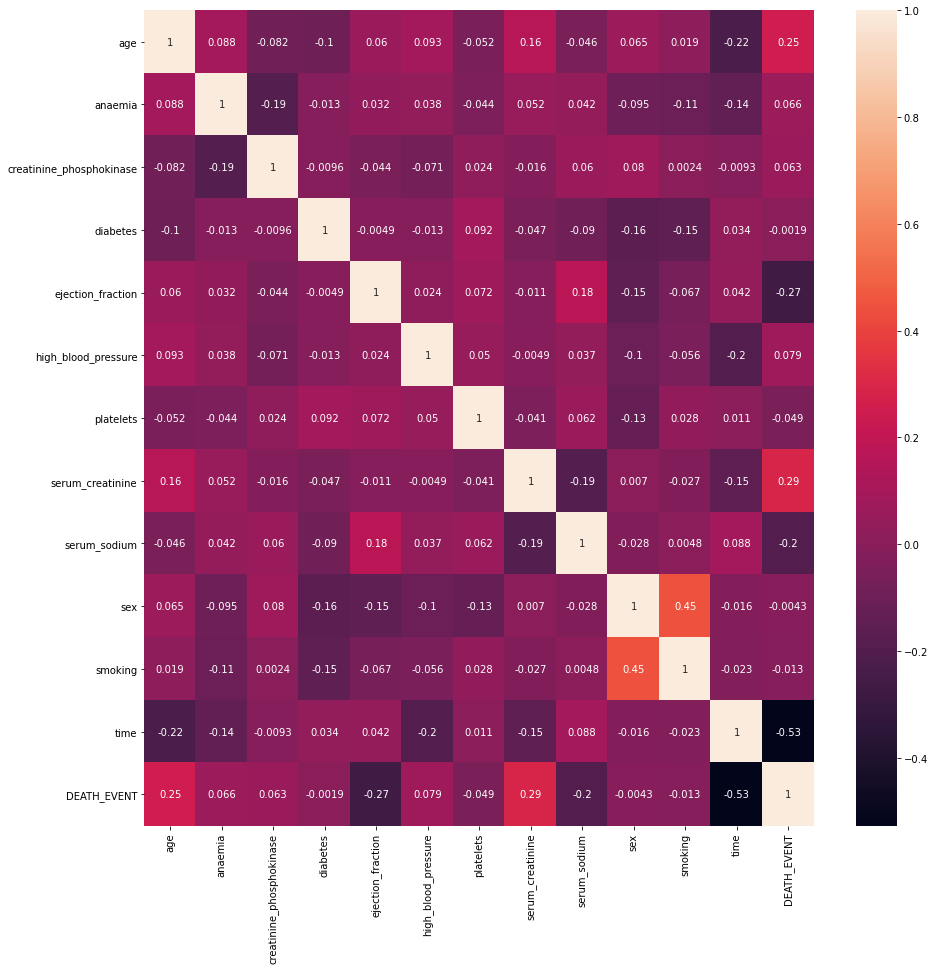

In [11]:
#Finding the correlation between different features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

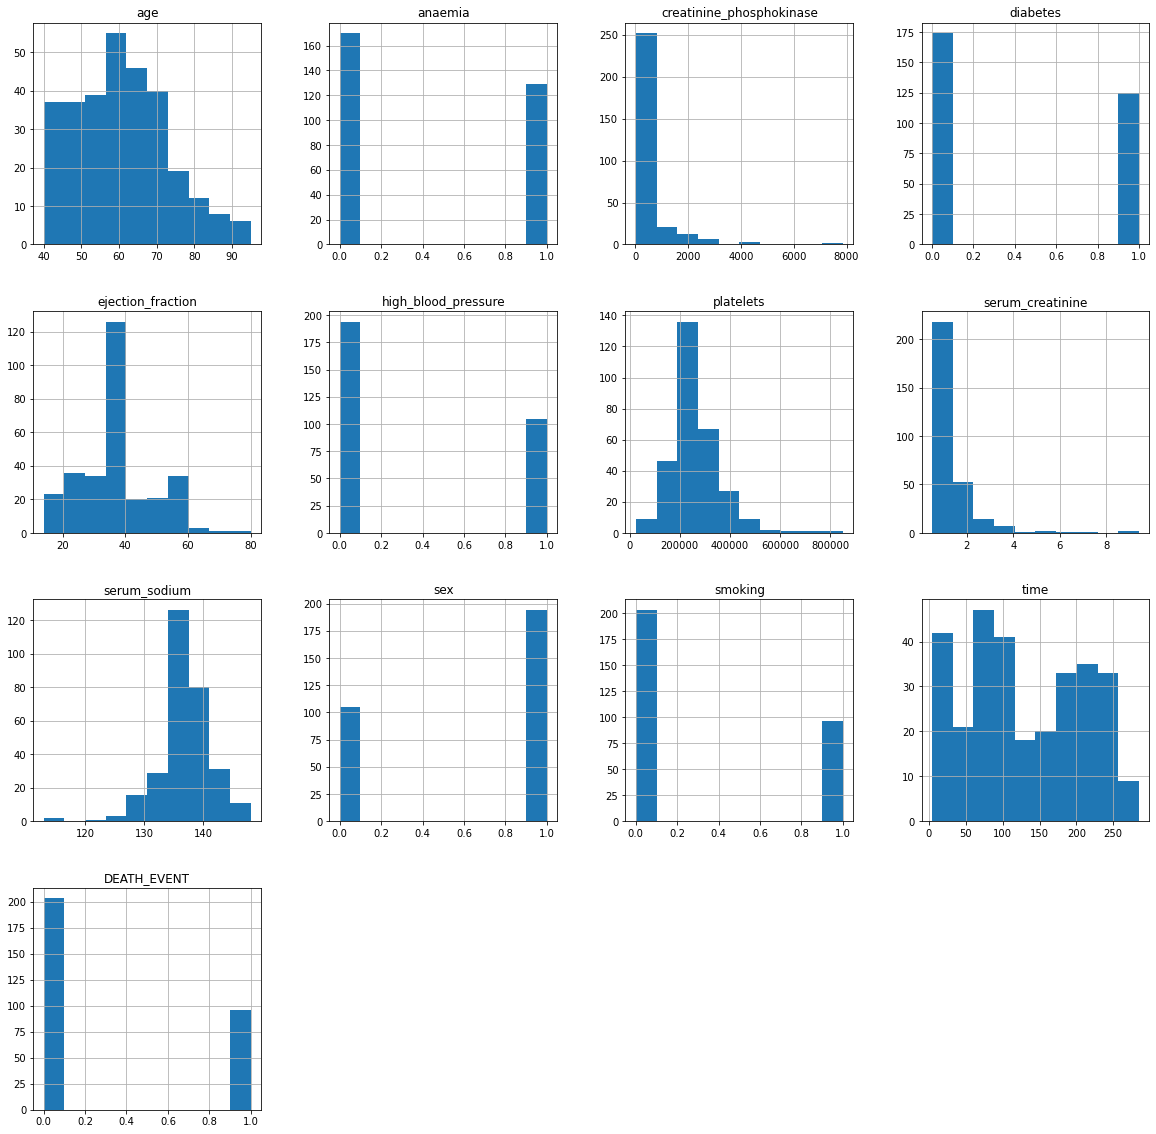

In [12]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

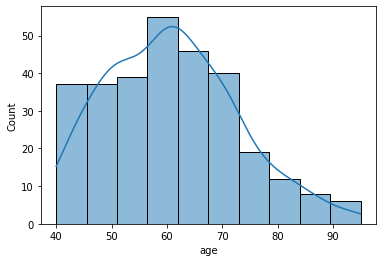

In [13]:
sns.histplot(df['age'], kde= True)
plt.show()

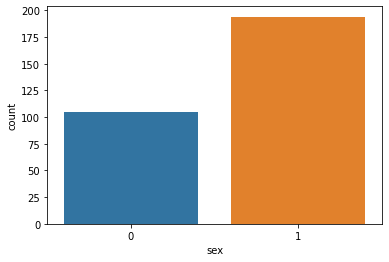

Male      194
Female    105
Name: sex, dtype: int64


In [14]:
sns.countplot(df.sex)
plt.show()

#Classifying 0 as Female and 1 as Male
classes = {0:'Female', 1:'Male'}
print(df.sex.value_counts().rename(index = classes))

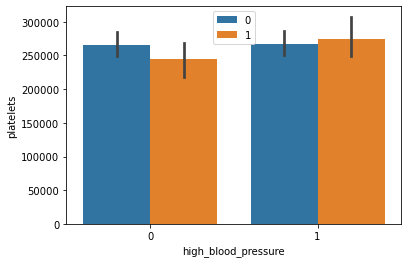

In [15]:
ax=sns.barplot(x='high_blood_pressure',y='platelets',hue='DEATH_EVENT',data=df)
plt.legend(loc=9)
plt.show()

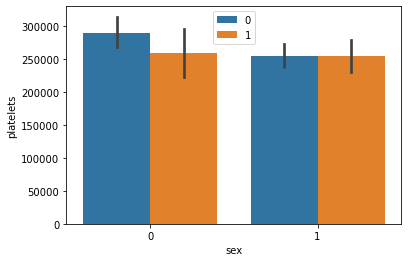

In [16]:
ax=sns.barplot(x='sex',y='platelets',hue='DEATH_EVENT',data=df)
plt.legend(loc=9)
plt.show()

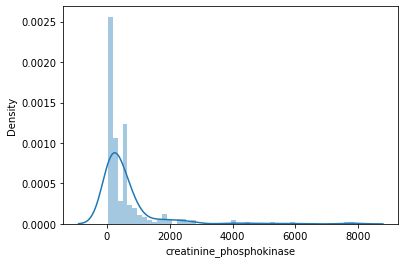

In [17]:
sns.distplot(df['creatinine_phosphokinase'], kde= True)
plt.show()

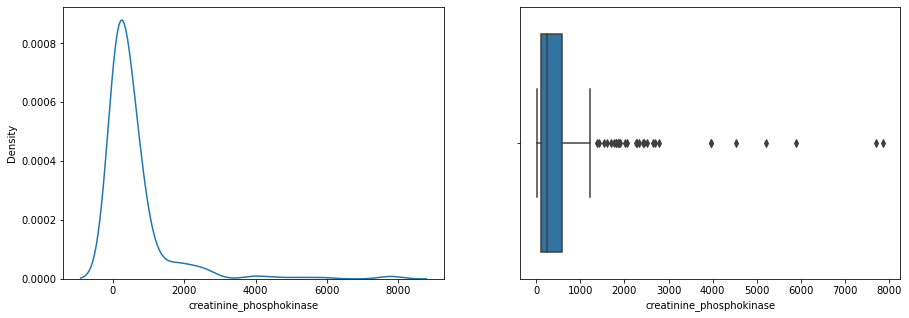

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['creatinine_phosphokinase'])

plt.subplot(1,2,2)
sns.boxplot(df['creatinine_phosphokinase'])
plt.show()

Column name creatinine_phosphokinase has outliers. It Seems like creatinine_phosphokinase are petty high levels and might be outliers, but looking at the data again these extreme levels might have actually led to the death event. So I decided to leave the outliers.

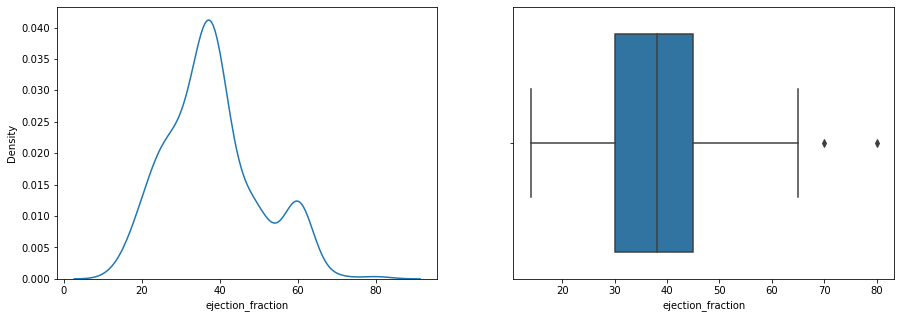

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['ejection_fraction'])

plt.subplot(1,2,2)
sns.boxplot(df['ejection_fraction'])
plt.show()

It seems like we have two outliers in ejection_fraction : 70, 80.

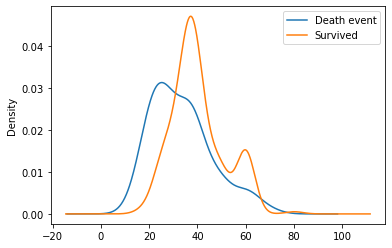

In [20]:
df[df["DEATH_EVENT"] == True]["ejection_fraction"].plot.kde(label="Death event")
df[df["DEATH_EVENT"] == False]["ejection_fraction"].plot.kde(label="Survived")
plt.legend()
plt.show()

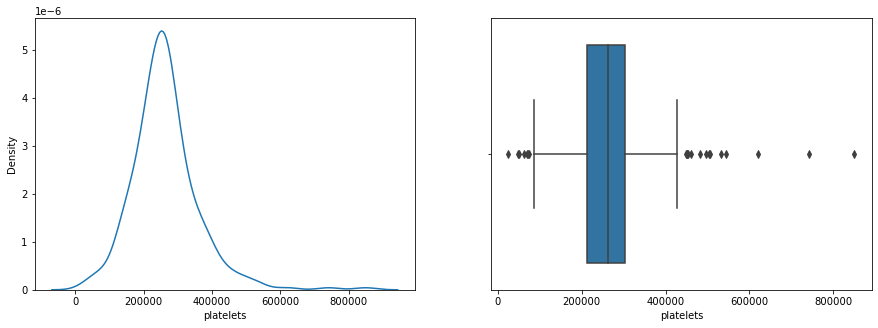

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['platelets'])

plt.subplot(1,2,2)
sns.boxplot(df['platelets'])
plt.show()

Seems line we have lots of outliers: values below 100 kiloplatelets/mL (100000) or higher than ~400 kiloplatelets/mL (400000). Normal platelets levels are 150-450 kiloplatelets/mL, while a value lower than 100000 is considered extremely low and above 450000 is considered very high. Seems like removing that value higher than 650000 would be a good choice (two outliers)


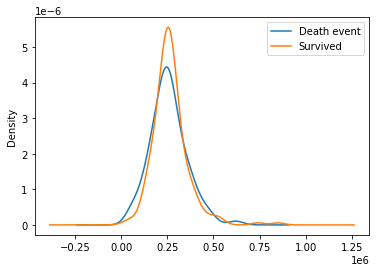

In [22]:
df[df["DEATH_EVENT"] == True]["platelets"].plot.kde(label="Death event")
df[df["DEATH_EVENT"] == False]["platelets"].plot.kde(label="Survived")
plt.legend()
plt.show()


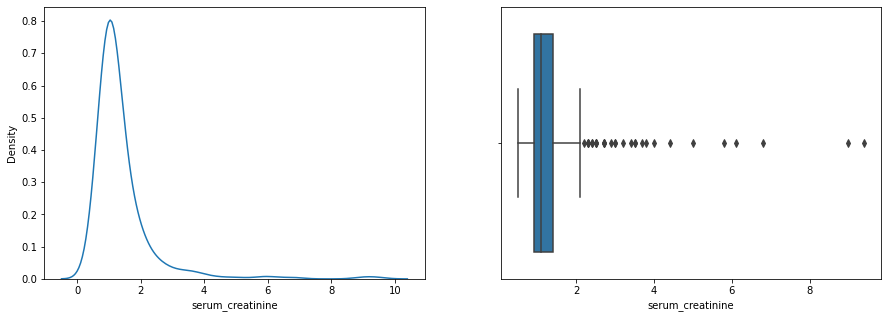

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['serum_creatinine'])

plt.subplot(1,2,2)
sns.boxplot(df['serum_creatinine'])
plt.show()

Values higher than 5 indicate severe kidney damage, so logically seems that serum creatinine levels higher than 8 are extremely high values (possibly outliers). Looking at the data I decided to leave them, because patients having values higher than 8 died from heart failure and it is possible than the high value is caused by additional medical disorder that lead to their death. Removing these outliers can lead to loss of valuable data!

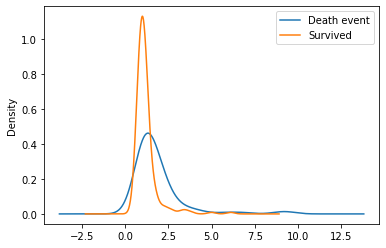

In [24]:
df[df["DEATH_EVENT"] == True]["serum_creatinine"].plot.kde(label="Death event")
df[df["DEATH_EVENT"] == False]["serum_creatinine"].plot.kde(label="Survived")
plt.legend()
plt.show()

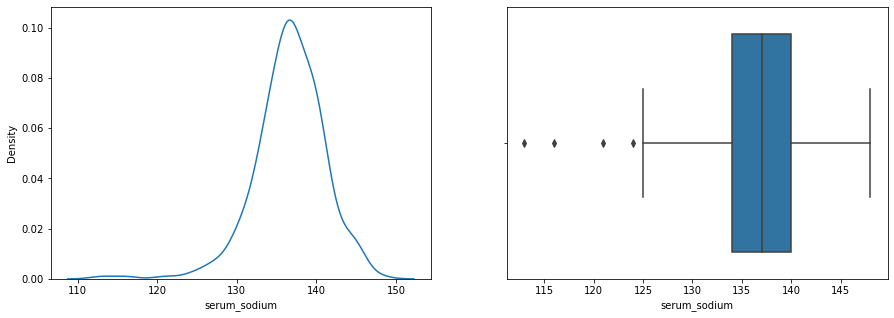

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['serum_sodium'])

plt.subplot(1,2,2)
sns.boxplot(df['serum_sodium'])
plt.show()

Normal values of serum sodium are 135-145 mEq/L, while values lower than 125 indicates severe Hyponatremia. Values under 120 would probably be outliers.

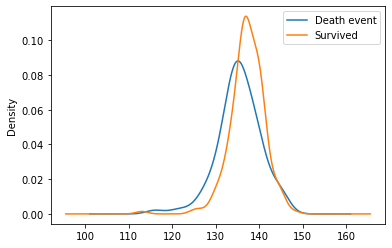

In [26]:
df[df["DEATH_EVENT"] == True]["serum_sodium"].plot.kde(label="Death event")
df[df["DEATH_EVENT"] == False]["serum_sodium"].plot.kde(label="Survived")
plt.legend()
plt.show()

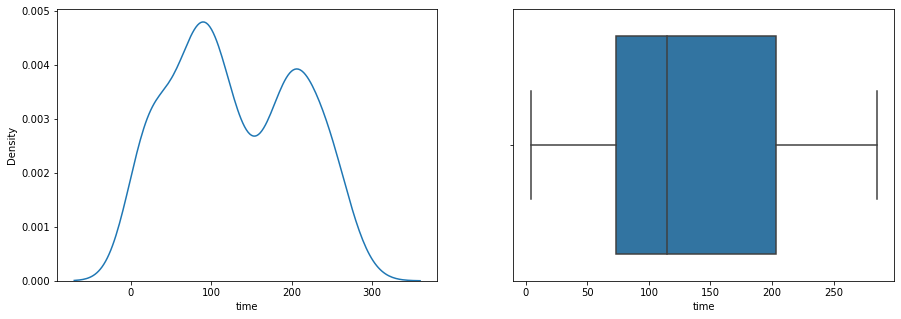

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['time'])

plt.subplot(1,2,2)
sns.boxplot(df['time'])
plt.show()

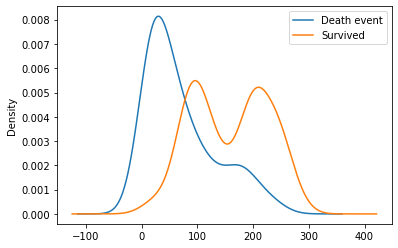

In [28]:
df[df["DEATH_EVENT"] == True]["time"].plot.kde(label="Death event")
df[df["DEATH_EVENT"] == False]["time"].plot.kde(label="Survived")
plt.legend()
plt.show()

Most of the features outliers are present. So we have to remove it.

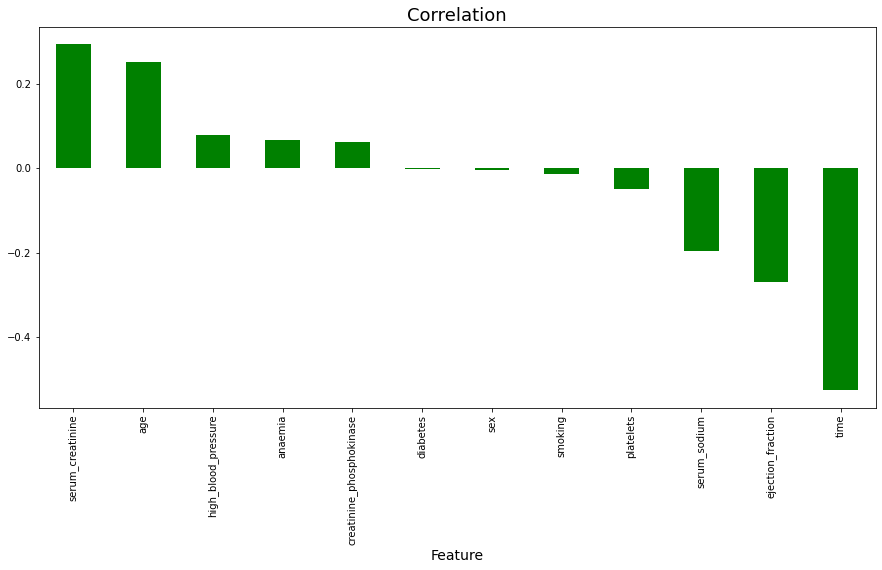

In [29]:
plt.figure(figsize=(15,7))
df.corr()['DEATH_EVENT'].sort_values(ascending=False).drop(['DEATH_EVENT']).plot(kind='bar', color='g')
plt.xlabel("Feature",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

## Data Cleaning
### Outlier Removal
* **Ejection Fraction**

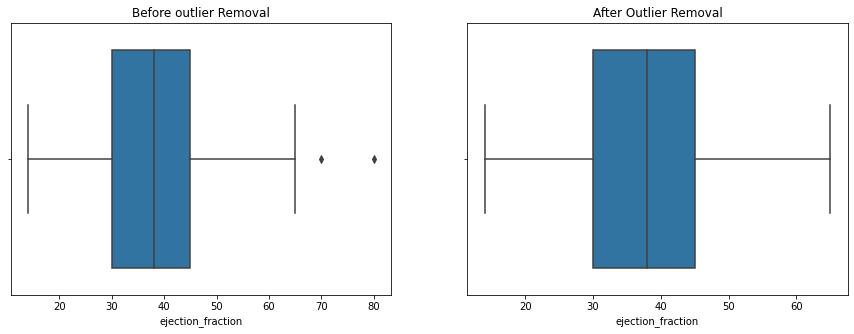

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['ejection_fraction'])
plt.title("Before outlier Removal")

#remove outliers
df = df.drop(df[df.ejection_fraction >=70].index)

plt.subplot(1,2,2)
sns.boxplot(df['ejection_fraction'])
plt.title('After Outlier Removal')
plt.show()

Outliers of Ejection Fraction is successfully removed.

* **Platelets**

In [31]:
df[df.platelets > 650000]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
109,45.0,0,292,1,35,0,850000.0,1.3,142,1,1,88,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0


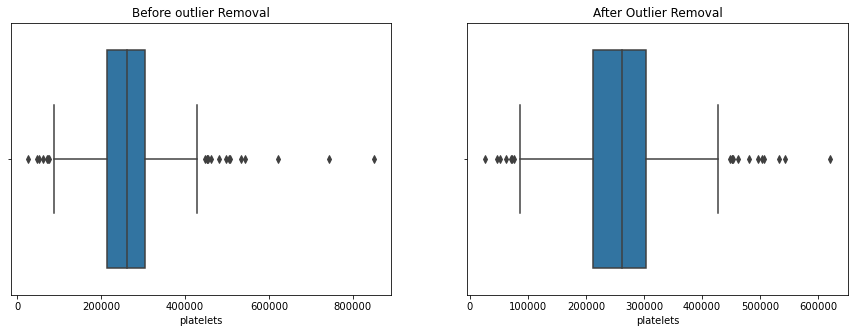

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['platelets'])
plt.title("Before outlier Removal")

df = df.drop(df[df.platelets >=650000].index)

plt.subplot(1,2,2)
sns.boxplot(df['platelets'])
plt.title('After Outlier Removal')
plt.show()

Outliers of platelets successfully removed.

* **Serum Sodium**

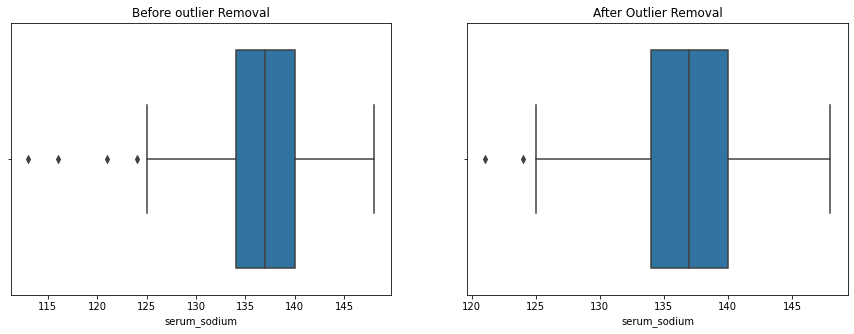

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['serum_sodium'])
plt.title("Before outlier Removal")

df = df.drop(df[df.serum_sodium < 120].index)

plt.subplot(1,2,2)
sns.boxplot(df['serum_sodium'])
plt.title('After Outlier Removal')
plt.show()

Outliers removed successfully.

* **Feature Importance**

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

[0.09113723 0.02657138 0.07703021 0.02831001 0.13631311 0.02794763
 0.07668978 0.1129542  0.08215052 0.02646317 0.02564606 0.28878671]


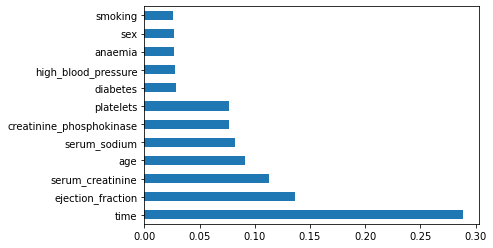

In [35]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [36]:
# In terms of percentage
feat_importances*100

age                          9.113723
anaemia                      2.657138
creatinine_phosphokinase     7.703021
diabetes                     2.831001
ejection_fraction           13.631311
high_blood_pressure          2.794763
platelets                    7.668978
serum_creatinine            11.295420
serum_sodium                 8.215052
sex                          2.646317
smoking                      2.564606
time                        28.878671
dtype: float64

In [37]:
feat_importances.nlargest(6)

time                        0.288787
ejection_fraction           0.136313
serum_creatinine            0.112954
age                         0.091137
serum_sodium                0.082151
creatinine_phosphokinase    0.077030
dtype: float64

In [38]:
sum(feat_importances.nlargest(6))

0.7883719654552838

## Splitting the data and Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.iloc[:,[0,2,4,7,8,11]]
y = df[['DEATH_EVENT']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (234, 6)
X_test Shape  :  (59, 6)
y_train Shape :  (234, 1)
y_test Shape  :  (59, 1)


## Model Building

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Logistic Regression


Accuracy Score:  86.4406779661017


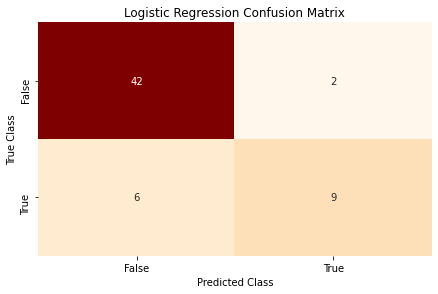

Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.82      0.60      0.69        15

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



In [43]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)


#Score
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('Accuracy Score: ', lr_accuracy*100)


#Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
classes_names = ['False', 'True']
lr_ConfusionMatrix = pd.DataFrame(lr_cm, index=classes_names, columns=classes_names)

sns.heatmap(lr_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, lr_y_pred))

## Decision Tree

Accuracy Score:  79.66101694915254


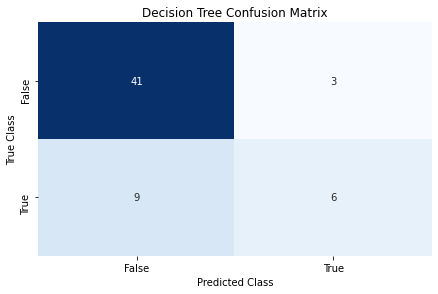

Classification Report:-
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.67      0.40      0.50        15

    accuracy                           0.80        59
   macro avg       0.74      0.67      0.69        59
weighted avg       0.78      0.80      0.78        59



In [44]:
#Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) #criterion can be entropy
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)


#Score
#Score
dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
print('Accuracy Score: ', dtree_accuracy*100)

#Confusion Matrix
dtree_cm = confusion_matrix(y_test, dtree_y_pred)
dtree_ConfusionMatrix = pd.DataFrame(dtree_cm, index=classes_names, columns=classes_names)

sns.heatmap(dtree_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, dtree_y_pred))

## Random Forest

Accuracy Score:  81.35593220338984


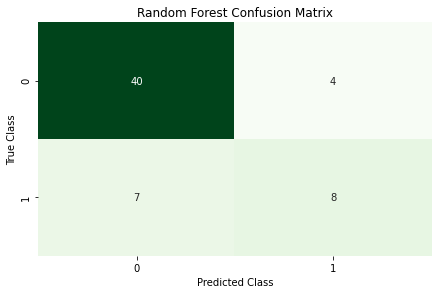

Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        44
           1       0.67      0.53      0.59        15

    accuracy                           0.81        59
   macro avg       0.76      0.72      0.74        59
weighted avg       0.80      0.81      0.81        59



In [45]:
#Random Forest Model
rfc = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)


#Score
#Score
rfc_accuracy = accuracy_score(y_test, rfc_y_pred)
print('Accuracy Score: ', rfc_accuracy*100)


#Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
rfc_ConfusionMatrix = pd.DataFrame(rfc_cm, index=classes_names, columns=classes_names)

sns.heatmap(rfc_cm, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, rfc_y_pred))

## Support Vector Classification

Accuracy Score:  84.7457627118644


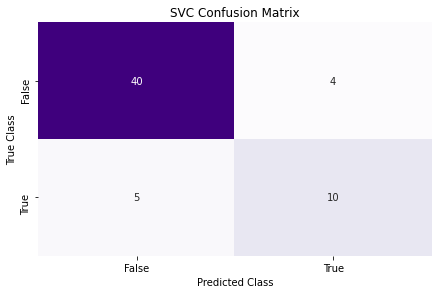

Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        44
           1       0.71      0.67      0.69        15

    accuracy                           0.85        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.84      0.85      0.85        59



In [46]:
#SVC Model
svc = SVC(kernel= 'rbf', max_iter=100, C=1.0, gamma='auto')
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

#Score
#Score
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print('Accuracy Score: ', svc_accuracy*100)


#Confusion Matrix
svc_cm = confusion_matrix(y_test, svc_y_pred)
svc_ConfusionMatrix = pd.DataFrame(svc_cm, index=classes_names, columns=classes_names)

sns.heatmap(svc_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, svc_y_pred))

## Ada Boost Classifier

Accuracy Score:  83.05084745762711


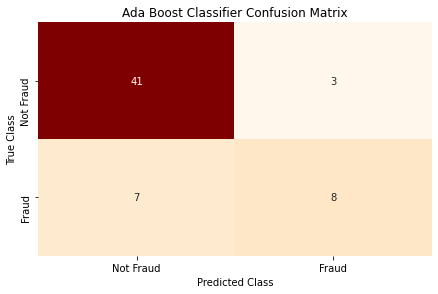

Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       0.73      0.53      0.62        15

    accuracy                           0.83        59
   macro avg       0.79      0.73      0.75        59
weighted avg       0.82      0.83      0.82        59



In [47]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb_y_pred = adb.predict(X_test)


#Score
#Score
adb_accuracy = accuracy_score(y_test, adb_y_pred)
print('Accuracy Score: ', adb_accuracy*100)


#Confusion Matrix
adb_cm = confusion_matrix(y_test, adb_y_pred)
classes_names = ['Not Fraud', 'Fraud']
adb_ConfusionMatrix = pd.DataFrame(adb_cm, index=classes_names, columns=classes_names)

sns.heatmap(adb_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Ada Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, adb_y_pred))

## Naive Bayes

Accuracy Score:  76.27118644067797


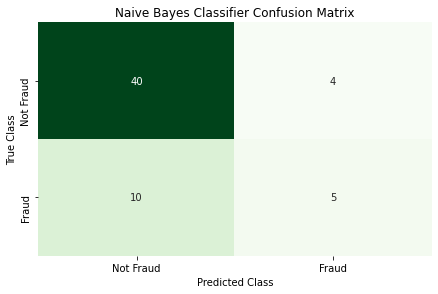

Classification Report:-
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        44
           1       0.56      0.33      0.42        15

    accuracy                           0.76        59
   macro avg       0.68      0.62      0.63        59
weighted avg       0.74      0.76      0.74        59



In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)


#Score
#Score
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print('Accuracy Score: ', gnb_accuracy*100)

#Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_y_pred)
classes_names = ['Not Fraud', 'Fraud']
gnb_ConfusionMatrix = pd.DataFrame(gnb_cm, index=classes_names, columns=classes_names)

sns.heatmap(gnb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Naive Bayes Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, gnb_y_pred))

## XG Boost Classifier

Accuracy Score:  83.05084745762711


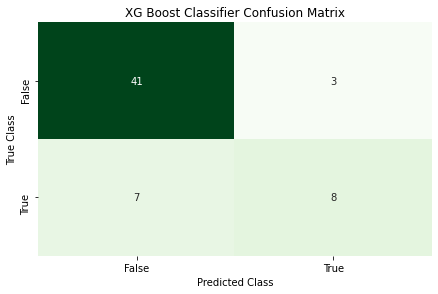

Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       0.73      0.53      0.62        15

    accuracy                           0.83        59
   macro avg       0.79      0.73      0.75        59
weighted avg       0.82      0.83      0.82        59



In [49]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)


#Score
#Score
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print('Accuracy Score: ', xgb_accuracy*100)

#Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
classes_names = ['False', 'True']

xgb_ConfusionMatrix = pd.DataFrame(xgb_cm, index=classes_names, columns=classes_names)

sns.heatmap(xgb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("XG Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, xgb_y_pred))

## Analysing different models

In [50]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy, svc_accuracy, adb_accuracy, gnb_accuracy, xgb_accuracy]})

models.sort_values(['Accuracy Score'], ascending=[False])

,Model,Accuracy Score
0,Logistic Regression,0.864407
3,Support Vector Machines,0.847458
4,Ada Boost Classifier,0.830508
6,XG Boost Classifier,0.830508
2,Random Forest,0.813559
1,Decision Tree,0.796610
5,Naive Bayes,0.762712


* Accuracy of Logistic Regression is better than other models 86.44%. We are increase our model accuracy by applying hyperparameter tuning.

## Model Created Successfully !!
# Thank You !